<a href="https://colab.research.google.com/github/Fedelberg/python_project/blob/main/sales_analysis_2nd_3mtt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sales Data Analysis: Uncovering Trends and Insights from a Real-World Sales Dataset

In today’s competitive market, data-driven decision-making is crucial for businesses to optimize their sales strategies. Sales data contains valuable insights that can help organizations understand customer behavior, identify seasonal trends, and improve overall performance. By analyzing a real-world sales dataset, businesses can make informed decisions to boost revenue and enhance customer satisfaction.

## Objective

Your analysis in this mini project will focus on cleaning, exploring, and visualizing a sales dataset to extract meaningful insights using python and data visualization libraries.

## About the Dataset

The **[dataset](https://drive.google.com/file/d/1V6HTxMsNQswvL_K39UWB7dh8Un8f4oz7/view?usp=sharing)** used in this analysis is a real-world sales dataset containing transaction records from a retail business. It includes the following key features:

- `OrderID`: The id or the order that was placed.
- `Date`: The date the order was placed.
- `CustomerID`: The customer ID that represents the customer who made the purchase.
- `Product`: The class of product that was purchased.
- `Quantity`: The quantity of the product that was purchased.
- `Price`: Unit price of the product in dollars.
- `Total`: The total cost of the purchase in dollars.


# New Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import requests

url = 'https://drive.google.com/uc?export=download&id=1V6HTxMsNQswvL_K39UWB7dh8Un8f4oz7'
response = requests.get(url)

# Save the file to a temporary location
with open('sales_data.csv', 'wb') as f:
    f.write(response.content)

# Load the data into a pandas DataFrame
df = pd.read_csv('sales_data.csv')

display(df.head())

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     190 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       194 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [ ]:

print(df.isnull().sum())

OrderID        0
Date           0
CustomerID     0
Product       10
Quantity       0
Price          0
Total          6
dtype: int64


**DATA CLEANING**

In [ ]:
#Drop rows with missing product values
df.dropna(subset=['Product'], inplace=True)

In [ ]:
#Calculate Total from Quantity and Price
df['Total'] = df['Quantity'] * df['Price']

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     190 non-null    int64 
 1   Date        190 non-null    object
 2   CustomerID  190 non-null    object
 3   Product     190 non-null    object
 4   Quantity    190 non-null    int64 
 5   Price       190 non-null    int64 
 6   Total       190 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.9+ KB


In [ ]:
print(df.isnull().sum())

OrderID       0
Date          0
CustomerID    0
Product       0
Quantity      0
Price         0
Total         0
dtype: int64


In [ ]:
df.describe()

,OrderID,Quantity,Price,Total
count,190.000000,190.000000,190.000000,190.000000
mean,101.400000,1.363158,672.105263,921.052632
std,57.234392,0.616965,300.459594,635.109412
min,1.000000,1.000000,100.000000,100.000000
25%,52.250000,1.000000,400.000000,600.000000
50%,102.500000,1.000000,600.000000,800.000000
75%,149.750000,2.000000,1000.000000,1000.000000
max,200.000000,3.000000,1000.000000,3000.000000


**EXPLORATORY DATA ANALYSIS**

In [ ]:
# Revenue and Profitability
total_revenue = df['Total'].sum()
print(f'Total Revenue: {total_revenue}')

NameError: name 'df' is not defined

In [ ]:
# Calculate total number of products sold
total_products_sold = df['Quantity'].sum()

print(f'Total Number of Products Sold: {total_products_sold}')

Total Number of Products Sold: 259


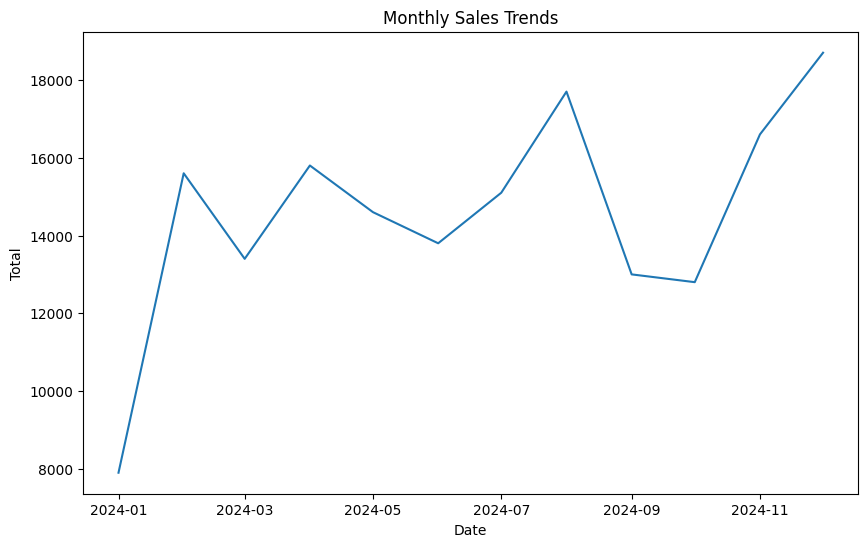

In [ ]:
# Sales Trends
df['Date'] = pd.to_datetime(df['Date'])
df_monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total'].sum().reset_index()
df_monthly_sales['Date'] = df_monthly_sales['Date'].dt.to_timestamp() # Convert Period to Timestamp
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Total', data=df_monthly_sales)
plt.title('Monthly Sales Trends')
plt.show()

Quarterly sales

In [ ]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculate quarterly sales
df['Quarter'] = df['Date'].dt.to_period('Q')
quarterly_sales = df.groupby('Quarter')['Total'].sum().reset_index()

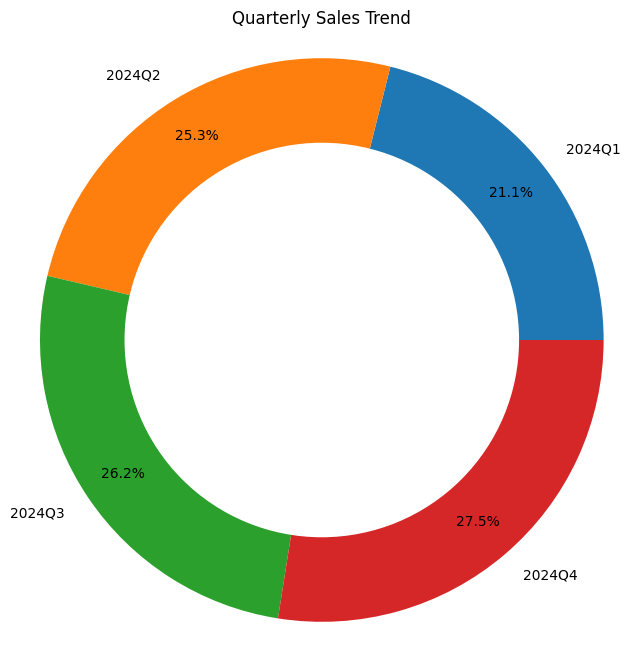

In [ ]:
# Plot donut chart
plt.figure(figsize=(8, 8))
plt.pie(quarterly_sales['Total'], labels=quarterly_sales['Quarter'].astype(str), autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Quarterly Sales Trend')
plt.show()

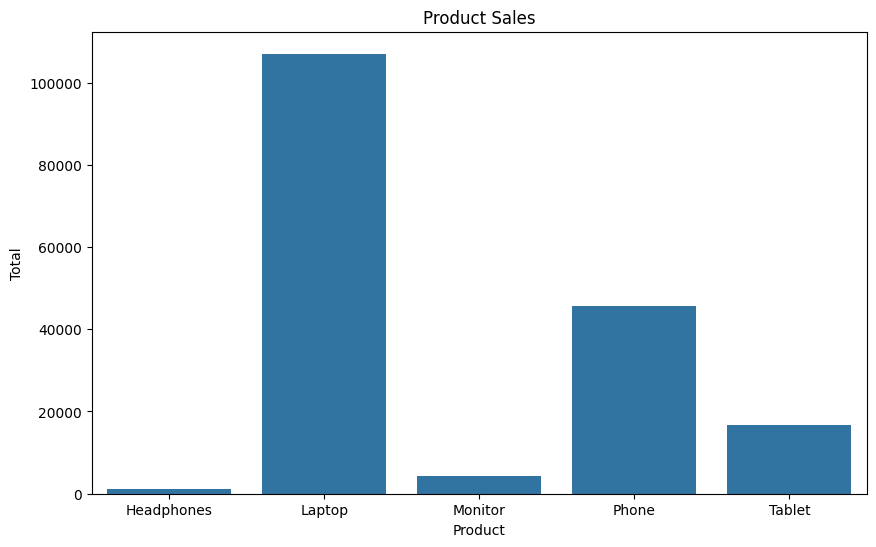

In [ ]:
# Product Performance
df_product_sales = df.groupby('Product')['Total'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Total', data=df_product_sales)
plt.title('Product Sales')
plt.show()


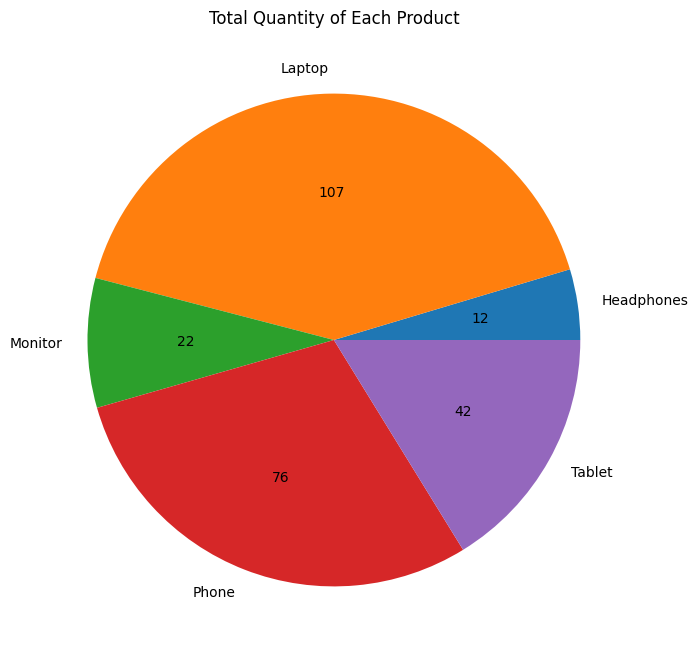

In [ ]:
# Get total quantity of each product
product_quantity = df.groupby('Product')['Quantity'].sum().reset_index()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_quantity['Quantity'], labels=product_quantity['Product'], autopct=lambda p : '{:,.0f}'.format(p * sum(product_quantity['Quantity']) / 100))
plt.title('Total Quantity of Each Product')
plt.show()

In [ ]:
# Get total quantity of each product
product_quantity = df.groupby('Product')['Quantity'].sum().reset_index()


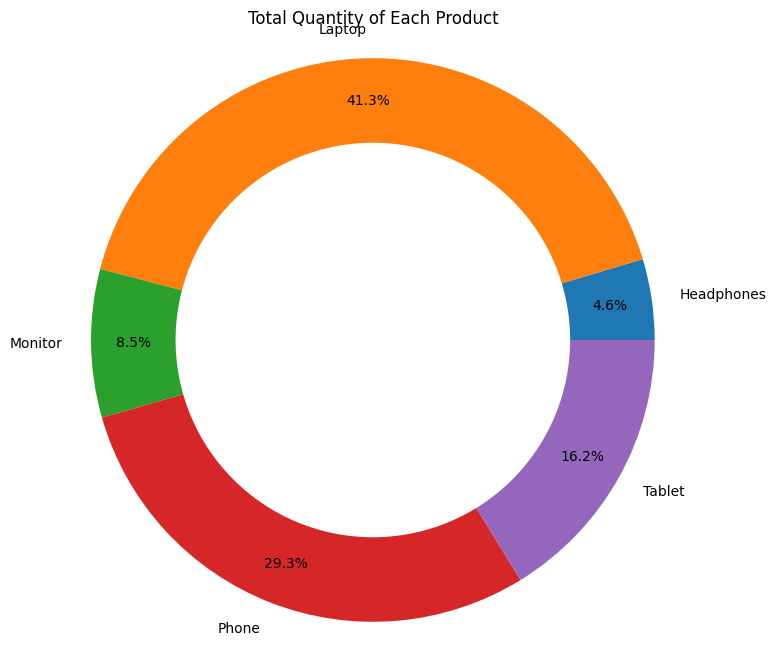

In [ ]:
# Plot donut chart
plt.figure(figsize=(8, 8))
plt.pie(product_quantity['Quantity'], labels=product_quantity['Product'], autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Total Quantity of Each Product')
plt.show()

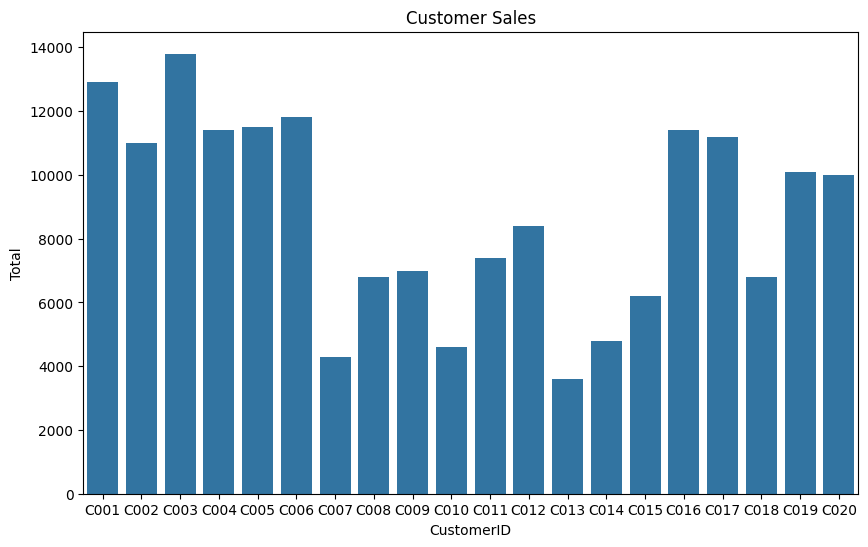

In [ ]:
# Customer Behavior
df_customer_sales = df.groupby('CustomerID')['Total'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='Total', data=df_customer_sales)
plt.title('Customer Sales')
plt.show()

In [ ]:
# Identify Top-Performing Products
top_products = df_product_sales.sort_values(by='Total', ascending=False).head(3)
print(top_products)

  Product   Total
1  Laptop  107000
3   Phone   45600
4  Tablet   16800


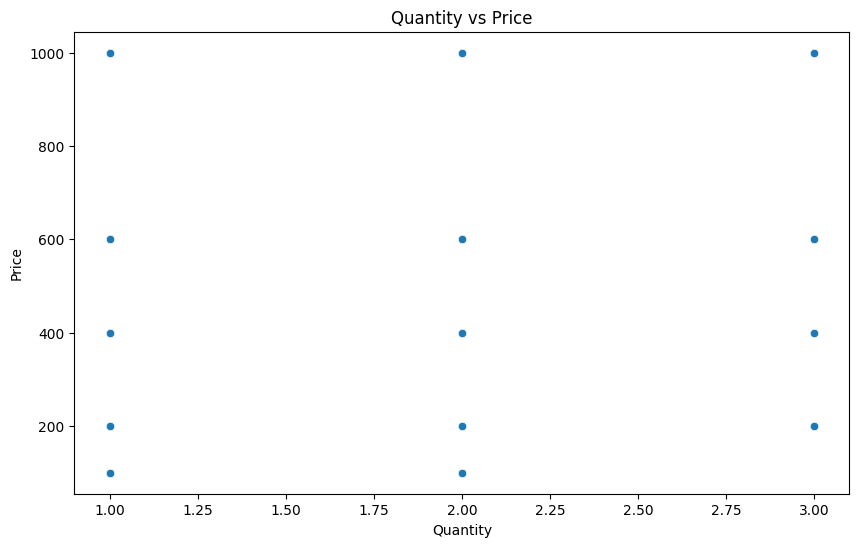

In [ ]:
# Optimize Pricing
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Price', data=df)
plt.title('Quantity vs Price')
plt.show()

In [ ]:
# Target High-Value Customers
high_value_customers = df_customer_sales.sort_values(by='Total', ascending=False).head(5)
print(high_value_customers)

   CustomerID  Total
2        C003  13800
0        C001  12900
5        C006  11800
4        C005  11500
15       C016  11400


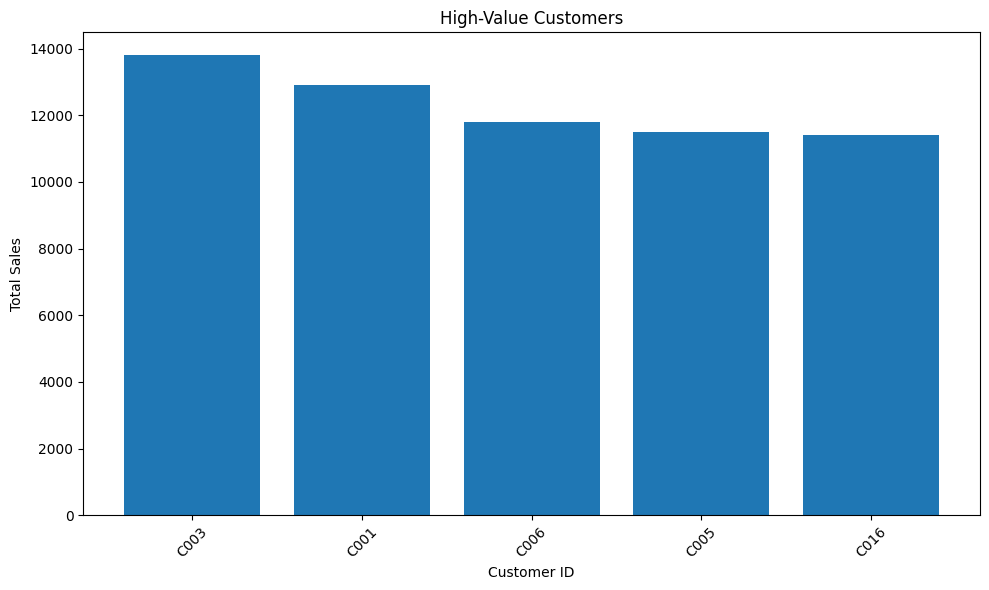

In [ ]:
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(high_value_customers['CustomerID'], high_value_customers['Total'])
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.title('High-Value Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()